In [2]:
import cirq
import numpy as np
from utils import *

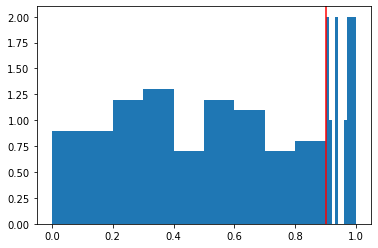

In [4]:
data = np.random.random(size = 100)
make_histogram(data)

In [5]:
fids = []
n_qubits_array = [2, 3, 4, 5, 6]
for n_qubits in n_qubits_array:
    layers_array = [10*n_qubits]
    n_circuits_array = [i*n_qubits*n_qubits for i in [5, 10, 25, 50, 100]]#[n_qubits*i for i in [1, 10, 50, 100, 200, 500]]

    for layers in layers_array:
        fid = []
        for n_circuits in n_circuits_array:
            angles = np.random.random((n_circuits, layers, n_qubits))
            paulis = np.random.randint(0,3,(n_circuits, layers, n_qubits))

            final_rho = 0
            for i in range(n_circuits):
                rho = cirq.final_density_matrix(generate_random_qnn(cirq.GridQubit.rect(1, n_qubits), angles[i], paulis[i], layers, initial_state = "+"))
                #print(np.trace(rho))
                final_rho += rho

            final_rho = final_rho/n_circuits

            fidelity = cirq.qis.fidelity(I_d(n_qubits), final_rho, qid_shape = 2**n_qubits)
            fid.append(fidelity)
        fids.append(fid)
        print(f'For {layers} layers, fidelity is {fid} for {n_circuits_array} circuits')
    print("-----------------------------")


For 20 layers, fidelity is [0.9382306215527277, 0.9740626599987211, 0.980647580565227, 0.9878836551008003, 0.9945691269793128] for [20, 40, 100, 200, 400] circuits
-----------------------------
For 30 layers, fidelity is [0.9640726156844197, 0.9777986708023332, 0.990816084038905, 0.9957465453734308, 0.9979979824654708] for [45, 90, 225, 450, 900] circuits
-----------------------------
For 40 layers, fidelity is [0.9549278174152277, 0.9775603035852135, 0.9902322417345767, 0.994813865277277, 0.9976065005585564] for [80, 160, 400, 800, 1600] circuits
-----------------------------
For 50 layers, fidelity is [0.9397836593203837, 0.9703975724728464, 0.9881604554698766, 0.9939149443110056, 0.9968418339698285] for [125, 250, 625, 1250, 2500] circuits
-----------------------------
For 60 layers, fidelity is [0.9104720126158327, 0.9554561650965812, 0.9825543694979348, 0.9911290426985561, 0.9957464235649237] for [180, 360, 900, 1800, 3600] circuits
-----------------------------


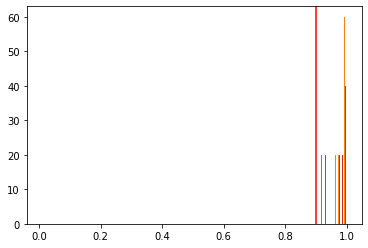

In [10]:
make_histogram(fids)

In [16]:
print(type(cirq.X))

<class 'cirq.circuits.circuit.Circuit'>
